# Plotly 다양한 시각화 방법
- plotly 학습 영상 참고 :  https://youtu.be/i-xbj0owgEE
- plotly 내장 데이터 설명 : https://plotly.com/python-api-reference/generated/plotly.express.data.html
- Plotly's Python graphing library makes interactive, publication-quality graphs.
- https://plotly.com/python/
- plotly를 좀더 쉽게 사용할 수 있도록 만든 라이브러리
    - plotly express
    - https://plotly.com/python/plotly-express/
- 설치 
    - pip install jupyter plotly ipywidgets jupyter-dash

# scatter plot 그리기

In [18]:
import plotly.io as pio
pio.renderers.default = 'iframe'

In [19]:
import plotly

In [20]:
import plotly.express as px

fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16],
                     width=600, height=400
                )
fig.show()

### iris 데이터 가져오기

In [21]:
import plotly.express as px

# 데이터 불러오기
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


[데이터 설명]
- sepal_length : 꽃받침의 길이, sepal_width : 꽃받침의 너비
- petal_length : 꽃잎의 길이, petal_width : 꽃잎의 너비
- species : 붓꽃 종류, species_id : 종류 숫자값  
  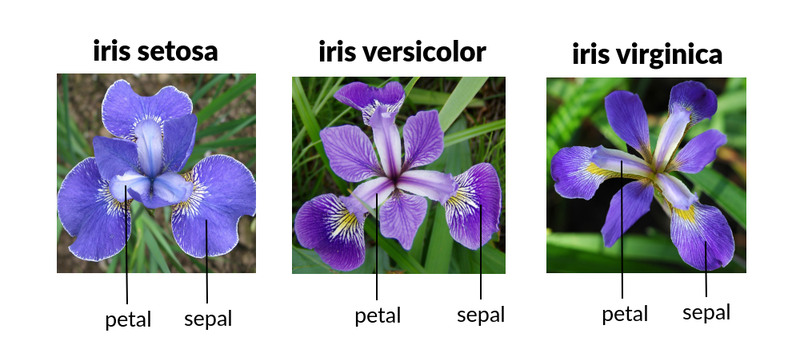

In [22]:
fig = px.scatter(
    data_frame=df, x="sepal_width", y="sepal_length",
    title="iris의 꽃받침 너비에 따른 꽃받침 길이 관계 분포도",
    width=800, 
    height=600
)
fig.show()

iris 꽃의 종에 따른 분포 확인

In [23]:
fig = px.scatter(
    data_frame=df, 
    x="sepal_width", 
    y="sepal_length",
    color="species",
    width=800, 
    height=600
)

fig.update_layout(
    title={
        'text': 'iris의 꽃받침 너비에 따른 꽃받침 길이 관계 분포도',
        'x': 0.5,  # x값을 0.5로 설정하여 가운데 정렬
        'y': 0.95  # y값을 0.95로 설정하여 상단에 위치
    }
)

fig.show()


In [24]:
fig = px.scatter(
    data_frame=df, 
    x="petal_width", 
    y="petal_length",
    title= "iris의 꽃잎 너비에 따른 꽃잎 길이 관계 분포도",
    width=800, 
    height=600
)
fig.show()

In [25]:
fig = px.scatter(
    data_frame=df, 
    x="petal_width", 
    y="petal_length",
    color="species",
    title= "iris의 꽃잎 너비에 따른 꽃잎 길이 관계 분포도",
    width=800, 
    height=600
)

fig.show()

# scatter - bubble 차트 그리기

In [26]:
# 데이터 준비
import numpy as np
x = np.arange(6)
y = np.arange(10, 16)
size = np.random.choice(10, size=6, replace=False)
color = np.random.choice(100, size=6, replace=False)

x, y, size, color

(array([0, 1, 2, 3, 4, 5]),
 array([10, 11, 12, 13, 14, 15]),
 array([8, 3, 4, 1, 7, 0]),
 array([29, 53, 31, 73, 37, 89]))

In [27]:
# scatter plot을 활용한 bubble 차트
fig = px.scatter(x=x, y=y,
                size=size, 
                color=color,  # 색상값 지정
                size_max=60,  # 최대크기 지정
                height=400
                )
fig.show()

### gapminder 데이터 - bubble chart 적용하기

In [28]:
gapminder = px.data.gapminder()
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


### gapminder 데이터
- country : 나라
- continent : 대륙  
- year : 년도  
- lifeExp : 기대 수명  
- pop : 인구수  
- gdpPercap : gdp  
- iso_alph : 나라 이니셜  
- iso_nu : id값

#### 2007년도의 대륙별 gdp와 수명 관계와 인구 분포 시각화

In [29]:
# 2007년도 인 값만 추출
gapminder_2007 = gapminder.query("year==2007")
gapminder_2007

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [30]:
fig = px.scatter(gapminder_2007,
                x='gdpPercap', y='lifeExp',
                size='pop', color='continent',
                log_x=True,   # log scale
                hover_name='country',
                size_max=60,  # 최대 크기 제한
                height = 800
                )
fig.show()

In [31]:
# 트랜드 라인 표현하기
fig = px.scatter(gapminder_2007,
                x='gdpPercap', y='lifeExp',
                size='pop', color='continent',
                trendline='lowess',
                height = 600
                )
fig.show()

In [32]:
# 각 년도별로 비교 해보기
fig = px.scatter(gapminder,
                x='gdpPercap', y='lifeExp',
                size='pop', color='continent',
                facet_col='year', 
                facet_col_wrap=3,
                height = 800
                )
fig.show()

# scater matrix 그리기

In [33]:
import plotly.express as px

# 데이터 불러오기
iris = px.data.iris()
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [34]:
fig = px.scatter_matrix(iris, height=600)

In [35]:
fig = px.scatter_matrix(iris, height=600,
                        dimensions=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
                        color = 'species'
                       )
fig.show()

In [36]:
# 데이터 불러오기
tips = px.data.tips()
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [37]:
fig = px.scatter_matrix(tips, height=600,
                        dimensions=['total_bill', 'tip', 'day', 'size'],
                        color = 'smoker'
                       )
fig.show()

[참고] graph_objects로 구현하기

In [38]:
import plotly.graph_objects as go

# 1. 데이터 생성
import numpy as np
np.random.seed(1)

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

# 2. Figure  생성
fig = go.Figure()

# 3. Scatter Trace 추가
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='markers',
                    name='markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='lines',
                    name='lines'))
# 4. 레이아웃 업데이트
fig.update_layout(
    width=800,  # 너비 지정 (픽셀 단위)
    height=500,  # 높이 지정 (픽셀 단위)
    title= "그래프 그리기"
)
# 5. 그래프 그리기
fig.show()

# line plot 그리기

In [39]:
import numpy as np
# np.linspace(start, stop, size, endpoint=False, dtype)
t = np.linspace(0, np.pi**2, 100)
t

array([0.        , 0.09969297, 0.19938595, 0.29907892, 0.39877189,
       0.49846487, 0.59815784, 0.69785082, 0.79754379, 0.89723676,
       0.99692974, 1.09662271, 1.19631568, 1.29600866, 1.39570163,
       1.49539461, 1.59508758, 1.69478055, 1.79447353, 1.8941665 ,
       1.99385947, 2.09355245, 2.19324542, 2.2929384 , 2.39263137,
       2.49232434, 2.59201732, 2.69171029, 2.79140326, 2.89109624,
       2.99078921, 3.09048219, 3.19017516, 3.28986813, 3.38956111,
       3.48925408, 3.58894705, 3.68864003, 3.788333  , 3.88802598,
       3.98771895, 4.08741192, 4.1871049 , 4.28679787, 4.38649084,
       4.48618382, 4.58587679, 4.68556977, 4.78526274, 4.88495571,
       4.98464869, 5.08434166, 5.18403463, 5.28372761, 5.38342058,
       5.48311356, 5.58280653, 5.6824995 , 5.78219248, 5.88188545,
       5.98157842, 6.0812714 , 6.18096437, 6.28065735, 6.38035032,
       6.48004329, 6.57973627, 6.67942924, 6.77912221, 6.87881519,
       6.97850816, 7.07820114, 7.17789411, 7.27758708, 7.37728

In [40]:
fig = px.line(x=t, y=np.cos(t), height=400, width = 800,
              labels={'x': 'time', 'y': 'cos(t)'}
              
             )
fig.show()

## line plot - gapminder 데이터 적용

In [41]:
gapminder = px.data.gapminder()
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [42]:
gapminder_asia = gapminder.query("continent=='Asia'")
# gapminder_asia = gapminder.loc[gapminder['continent']=="Asia"]

In [43]:
px.line(gapminder_asia, x='year', y='lifeExp', color='country',
        height=500
       )

## 시계열 데이터 
- apple 주식 데이터 : https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv

In [44]:
import pandas as pd
url = "https://raw.githubusercontent.com/plotly/datasets/master/finance-charts-apple.csv"
apple = pd.read_csv(url)
apple.head()

,Date,AAPL.Open,AAPL.High,AAPL.Low,AAPL.Close,AAPL.Volume,AAPL.Adjusted,dn,mavg,up,direction
0,2015-02-17,127.489998,128.880005,126.919998,127.830002,63152400,122.905254,106.741052,117.927667,129.114281,Increasing
1,2015-02-18,127.629997,128.779999,127.449997,128.720001,44891700,123.760965,107.842423,118.940333,130.038244,Increasing
2,2015-02-19,128.479996,129.029999,128.330002,128.449997,37362400,123.501363,108.894245,119.889167,130.884089,Decreasing
3,2015-02-20,128.619995,129.500000,128.050003,129.500000,48948400,124.510914,109.785449,120.763500,131.741551,Increasing
4,2015-02-23,130.020004,133.000000,129.660004,133.000000,70974100,127.876074,110.372516,121.720167,133.067817,Increasing


In [45]:
# apple의 종가 라인 차트로 표현
fig=px.line(apple, x='Date', y='AAPL.Close', 
            height=400, width=800
           )
fig.show()

In [46]:
# x 축의 범위 지정
fig=px.line(apple, x='Date', y='AAPL.Close', 
            range_x = ['2016-02-01', '2017-02-27'],
            height=400, width=800
           )
fig.show()

In [47]:
# x 축의 범위 지정
fig=px.line(apple, x='Date', y='AAPL.Close', 
            range_x = ['2016-02-01', '2017-02-27'],
            height=400, width=800
           )
# x축 range slider 설정
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [48]:
fig = go.Figure(
    data=[go.Candlestick(
        x=apple['Date'],
        open=apple['AAPL.Open'],
        high=apple['AAPL.High'],
        low=apple['AAPL.Low'],
        close=apple['AAPL.Close'],
    )])
fig.update_layout(
    width=900,  # 너비 지정 (픽셀 단위)
    height=500,  # 높이 지정 (픽셀 단위)
    title= "apple 주식 그래프"
)
fig.show()

In [49]:
fig = go.Figure(
    data=[go.Candlestick(
        x=apple['Date'],
        open=apple['AAPL.Open'],
        high=apple['AAPL.High'],
        low=apple['AAPL.Low'],
        close=apple['AAPL.Close'],
        # 색상 표현 변경
        increasing_line_color='red',
        decreasing_line_color='blue'
    )])
fig.update_layout(
    width=900,  # 너비 지정 (픽셀 단위)
    height=500,  # 높이 지정 (픽셀 단위)
    title= "apple 주식 그래프"
)
fig.show()

# bar plot 그리기
- 참고 : https://plotly.com/python/bar-charts/

In [50]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2], width=800,height=500)
fig.show()

In [51]:
import plotly.express as px
# 데이터 가져오기

datas =  px.data.gapminder()
datas

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


## 데이터 이해 : 각 나라의 연도별 인구정보
- country : 나라
- continent : 대륙
- year : 년도
- lifeExp : 기대 수명
- pop : 인구수
- gdpPercap : gdp
- 'iso_alph' : 나라 이니셜
- 'iso_nu' : id값'

In [52]:
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [53]:
datas['country'].value_counts()

country
Afghanistan          12
Pakistan             12
New Zealand          12
Nicaragua            12
Niger                12
                     ..
Eritrea              12
Equatorial Guinea    12
El Salvador          12
Egypt                12
Zimbabwe             12
Name: count, Length: 142, dtype: int64

In [54]:
# country 컬럼의 값 읽기
datas['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [55]:
data_canada = datas.query("country == 'Canada'")
fig = px.bar(data_canada, x='year', y='pop', width=700, height=500)
fig.show()

### [문제] 한국과 미국의 GDP 비교하기

In [56]:
# 한국, 미국 데이터만 가져오기
data_korea_usa = datas[datas['country'].isin(['Korea, Rep.', 'United States'])]

In [57]:
data_korea_usa.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
840,"Korea, Rep.",Asia,1952,47.453,20947571,1030.592226,KOR,410
841,"Korea, Rep.",Asia,1957,52.681,22611552,1487.593537,KOR,410
842,"Korea, Rep.",Asia,1962,55.292,26420307,1536.344387,KOR,410
843,"Korea, Rep.",Asia,1967,57.716,30131000,2029.228142,KOR,410
844,"Korea, Rep.",Asia,1972,62.612,33505000,3030.876650,KOR,410


In [58]:
# 그래프 그리기
fig = px.bar(data_korea_usa, x='year', y='gdpPercap', color="country",
             width=800, height=500,
             title = "한국과 미국의 GDP 비교",
             barmode = "group"
            )
fig.show()

공식 문서 활용해 보기
https://plotly.com/python/bar-charts/

In [59]:
import plotly.express as px

# df = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(data_korea_usa, x='year', y='pop',
             hover_data=['lifeExp', 'gdpPercap'], 
             color='lifeExp',  # 숫자형 데이터는 그라데이션으로 표현
             labels={'pop':'population of Canada'}, 
             height=400
            )
fig.show()

### 문제2 위의 샘플 활용하기
- 그래프에 hover_data에 lifeExp를 추가하고, x축, y축, 라벨의 이름을 각각 GDP, 년도, 나라로 변경

In [60]:
# 그래프 그리기
fig = px.bar(data_korea_usa, x='year', y='gdpPercap', color="country",
             width=800, height=500,
             hover_data=['lifeExp'], 
             title = "한국과 미국의 GDP 비교",
             labels= {
                 'year': '년도',
                 'gdpPercap': 'GDP',
                 'country': '나라'
             },
             barmode = "group"
            )
fig.show()

## facetted subplot로 표현하기
- 여러개의 subplot을 그릴때 사용

In [61]:
import plotly.express as px
df = px.data.tips()
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [62]:
fig = px.bar(df, x="sex", y="total_bill", color="smoker", barmode="group",
             # facet_row : 행방향, facet_col : 컬럼방향
             facet_row="time", facet_col="day",

             # 그래프를 그릴 때 순서 맵핑
             category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
                              "time": ["Lunch", "Dinner"]},
             height= 500
            )
fig.show()

### 실습3 Facetted subplot 실습
- 실습2 그래프를 korea와 US 각각의 그래프로 표현하기

In [63]:
# 그래프 그리기
fig = px.bar(data_korea_usa, x='year', y='gdpPercap', # color="country",
             height=500,
             hover_data=['lifeExp'], 
             facet_row = 'country', 
             title = "한국과 미국의 GDP 비교",
             labels= {
                 'year': '년도',
                 'gdpPercap': 'GDP',
                 'country': '나라'
             },
             barmode = "group"
            )
fig.show()

In [64]:
# plotly express 불러오기
import plotly.express as px

df = px.data.tips()

In [65]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [66]:
fig = px.histogram(data_frame=df, x="total_bill", nbins=30,
                width=800, 
                height=500
                )  # color, = sns의 hue
fig.show()

In [67]:
fig = px.histogram(data_frame=df, x="total_bill", nbins=30, 
                    color="smoker",
                    width=800, 
                    height=500
                  )  # color, = sns의 hue
fig.show()

## box plot

In [68]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [69]:
# boxplot

fig = px.box(df, x="day",
            y="total_bill", 
            color="smoker",
            width=800, 
            height=500
            )
fig.show()

In [70]:
# boxplot
fig = px.box(df, x="day", y="total_bill", 
            color="smoker", 
            notched=True,
            width=800, 
            height=500
            )
fig.show()

## ecdf plot
- ECDF는 경험적 누적분포 함수라고 부르고, 서로 다른 표본들의 분포를 비교할 때 많이 사용하고, 각 집단의 백분위를 추정할 수 있음
- y축은 x축의 값이 전체 데이터에서 차지하는 비율을 의미함

In [71]:
import plotly.express as px
df = px.data.tips()
fig = px.ecdf(df, x="total_bill", color="sex",
                width=800, 
                height=500
             )
fig.show()

In [72]:
# gantt chart
import plotly.express as px
import pandas as pd

df = pd.DataFrame([
    dict(Task="Job A", Start='2009-01-01', Finish='2009-02-28', Resource="Alex"),
    dict(Task="Job B", Start='2009-03-05', Finish='2009-04-15', Resource="Alex"),
    dict(Task="Job C", Start='2009-02-20', Finish='2009-05-30', Resource="Max")
])

fig = px.timeline(df, x_start="Start", 
                x_end="Finish", 
                y="Resource", 
                color="Resource",
                width=800, 
                height=500
                 )
fig.show()

In [73]:
import plotly.express as px
data = dict(
    number=[39, 27.4, 20.6, 11, 2],
    stage=["Website visit", "Downloads", "Potential customers", "Requested price", "Invoice sent"])
fig = px.funnel(data, x='number', y='stage',
                width=600, 
                height=400
               )
fig.show()

In [74]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007").query("continent == 'Europe'")
df.loc[df['pop'] < 2.e6, 'country'] = 'Other countries' # Represent only large countries
fig = px.pie(df, values='pop', 
            names='country', 
            title='Population of European continent',
            width=800, 
            height=500,
            hole=0.4,
            )
fig.show()

In [75]:
import plotly.express as px
import numpy as np
df = px.data.gapminder().query("year == 2007")
fig = px.icicle(df, path=[px.Constant('world'), 'continent', 'country'], values='pop',
                color='lifeExp', hover_data=['iso_alpha'],
                width=640, 
                height=500
               )
fig.show()

In [76]:
import plotly.express as px
data=[[1, 25, 30, 50, 1], [20, 1, 60, 80, 30], [30, 60, 1, 5, 20]]
fig = px.imshow(data,
                labels=dict(x="Day of Week", y="Time of Day", color="Productivity"),
                x=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],
                y=['Morning', 'Afternoon', 'Evening'],
                text_auto=True,
                width=800, 
                height=500
               )
fig.update_xaxes(side="top")
fig.show()

In [77]:
import plotly.graph_objs as go
import plotly.express as px
import plotly.express as px
df = px.data.tips()
category_orders_dict = dict(day=["Thur", "Fri", "Sat", "Sun"],
                            time=["Lunch", "Dinner"],
                            smoker=['No','Yes'])

fig = px.density_heatmap(df, x="sex", y="day", 
                         text_auto=True, 
                         category_orders=category_orders_dict,
                         width=400, height=500
                        )
fig.show()

# Maps 그리기

## charshare 데이터
한 달 동안 몬트리올의 구역 중심 근처에서 자동차 공유 서비스의 가용성을 나타낸 데이터
- centroid_lat : 위도
- centroid_lon : 경도
- car_hours : 
- peak_hour : peak 시간

In [78]:
import plotly.express as px
carshare = px.data.carshare()
carshare

,centroid_lat,centroid_lon,car_hours,peak_hour
0,45.471549,-73.588684,1772.750000,2
1,45.543865,-73.562456,986.333333,23
2,45.487640,-73.642767,354.750000,20
3,45.522870,-73.595677,560.166667,23
4,45.453971,-73.738946,2836.666667,19
...,...,...,...,...
244,45.547171,-73.556258,951.416667,3
245,45.546482,-73.574939,795.416667,2
246,45.495523,-73.627725,425.750000,8
247,45.521199,-73.581789,1044.833333,17


In [79]:
carshare = px.data.carshare()
fig = px.scatter_mapbox(carshare, lat="centroid_lat", lon="centroid_lon", 
                        color="peak_hour", size="car_hours",
                        # color_continuous_scale=px.colors.cyclical.IceFire, 
                        color_continuous_scale=px.colors.cyclical.Edge, 
                        size_max=15, zoom=10,
                        hover_data=["car_hours","peak_hour"],
                        mapbox_style="carto-positron",
                        width=800, height=800
                       )
fig.show()

In [80]:
import pandas as pd
file_path = "datas/서울교통공사_1_8호선역사좌표(위경도)정보_20211231.csv"
seoul_train_df = pd.read_csv(file_path)
seoul_train_df

,연번,호선,고유역번호(외부역코드),역명,위도,경도,작성일자
0,1,1,150,서울,37.553150,126.972533,1974-02-28
1,2,1,151,시청,37.563590,126.975407,1974-08-15
2,3,1,152,종각,37.570203,126.983116,1974-08-15
3,4,1,153,종로3가,37.570429,126.992095,1974-08-15
4,5,1,154,종로5가,37.570971,127.001900,1974-03-31
...,...,...,...,...,...,...,...
271,272,8,2823,남한산성입구,37.451568,127.159845,1996-10-31
272,273,8,2824,단대오거리,37.445057,127.156735,1996-12-28
273,274,8,2825,신흥,37.440952,127.147590,1996-12-28
274,275,8,2826,수진,37.437575,127.140936,1996-12-28


In [81]:
seoul_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   연번            276 non-null    int64  
 1   호선            276 non-null    int64  
 2   고유역번호(외부역코드)  276 non-null    int64  
 3   역명            276 non-null    object 
 4   위도            276 non-null    float64
 5   경도            276 non-null    float64
 6   작성일자          276 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 15.2+ KB


In [82]:
fig = px.scatter_mapbox(seoul_train_df, lat="위도", lon="경도", 
                        color="호선", 
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        hover_data=["호선", "역명"],
                        mapbox_style="carto-positron",
                        width=600, height=600
                       )
fig.show()

## 한국 시/도별 지도 데이터로 지리 시각화 해보기
- 대한민국 행정동 경계 파일 :  https://github.com/vuski/admdongkor
- 데이터 : https://github.com/raqoon886/Local_HangJeongDong

In [83]:
from urllib.request import urlopen
import pandas as pd
import plotly.express as px
import json

In [84]:
import os, json
import pandas as pd
import plotly.express as px

In [85]:
!git clone https://github.com/raqoon886/Local_HangJeongDong.git 

Cloning into 'Local_HangJeongDong'...


In [86]:
with open('Local_HangJeongDong/hangjeongdong_서울특별시.geojson', 'r') as f:
    seoul_geo = json.load(f)

In [87]:
# url = "https://raw.githubusercontent.com/raqoon886/Local_HangJeongDong/master/hangjeongdong_%EC%84%9C%EC%9A%B8%ED%8A%B9%EB%B3%84%EC%8B%9C.geojson"
# with urlopen(url) as res:
#     seoul_geo = json.load(res)
# seoul_geo   

In [88]:
seoul_info = pd.read_csv('Local_HangJeongDong/sample.txt', sep="\t", encoding="utf-8")
seoul_info.head()

,기간,자치구,동,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,동,세대,합계,합계,합계,한국인,한국인,한국인,외국인,외국인,외국인,세대당인구,65세이상고령자
1,기간,자치구,동,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2021.2/4,합계,합계,"4,405,638","9,795,426","4,756,178","5,039,248","9,565,990","4,649,442","4,916,548","229,436","106,736","122,700",2.17,"1,576,971"
3,2021.2/4,종로구,소계,"73,525","155,106","75,009","80,097","146,029","70,985","75,044","9,077","4,024","5,053",1.99,"27,605"
4,2021.2/4,종로구,사직동,"4,674","9,636","4,380","5,256","9,371","4,225","5,146",265,155,110,2,"1,761"


In [89]:
seoul_info = seoul_info.iloc[3:,:]
seoul_info = seoul_info[seoul_info['동']!='소계']
seoul_info['full_name'] = '서울특별시'+' '+seoul_info['자치구']+' '+seoul_info['동']
seoul_info['full_name'] = seoul_info['full_name'].apply(lambda x: x.replace('.','·'))
seoul_info['인구'] = seoul_info['인구'].apply(lambda x: int(''.join(x.split(','))))

In [90]:
fig = px.choropleth_mapbox(seoul_info,
                           geojson=seoul_geo,
                           locations='full_name',
                           color='인구',
                           color_continuous_scale='viridis', 
                           featureidkey = 'properties.adm_nm',
                           mapbox_style='carto-positron',
                           zoom=9.5,
                           center = {"lat": 37.563383, "lon": 126.996039},
                           opacity=0.5,
                           height=500
                          )
fig.show()